<h2>Linear Algebra (CpE210A)<b>
<h4><b>Laboratory 2: Plotting Vectors using NumPy and MatPlotLib<b>
<h5>Coded and submitted by:<h5>
    <h5><i>Nietes,Ralf Joshua M.<i>
    <h5><i>58011<i>
<h5><b>Lab Exercises:<b>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

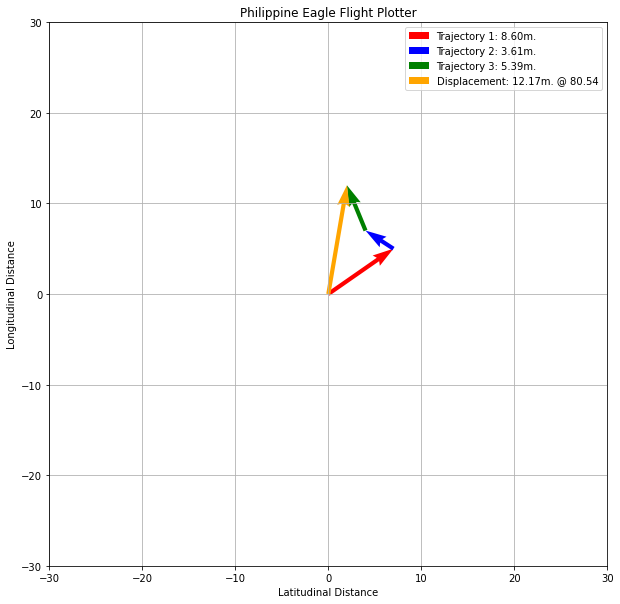

In [3]:
def track_eagle(make_figs=True):
    long = np.random.randint(-10,10, size=3)
    lat = np.random.randint(-10,10, size=3)
    dist1  = np.array([lat[0], long[0]])                            
    dist2  = np.array([lat[1], long[1]])  
    dist3  = np.array([lat[2], long[2]])
    dist12 = np.add (dist1, dist2)
    dist_total = np.add (dist12, dist3)
    disp = np.sqrt ((dist_total[0]**2) + (dist_total[1]**2))
    alpha = 10**-6
    theta =  np.arctan(dist_total[1]/(dist_total[0] + alpha))
    theta = np.degrees(theta)
    
    plt.figure(figsize=(10,10))
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    n = 2
    

    
    plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue',
              label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
              label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    plt.quiver(0,0, dist_total[0], dist_total[1], 
               angles='xy', scale_units='xy',scale=1, color='orange',
              label='Displacement: {:.2f}m. @ {:.2f}'.format(disp, theta))
    
    plt.legend()
    
    if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    
    plt.show()
track_eagle()

<h5><center><i>The eagle_kinematics function is created to calculate the vector, speed and accelaration. An input from user is needed to produce an output from this program. The input needed are speed and time. The equations that will be use in the graded cell 2 are listed below.<i>

<h5><center><i>$$speed_{vector}=(speed_{w} time\_vect_{w}) + (speed_{x} time\_vect_{x}) + (speed_{y} time\_vect_{y}) + (speed_{z} time\_vect_{z})$$
$$vector_{time}=(vector_{x} time\_vect_{x}) + (vector_{y} time\_vect_{y}) + (vector_{z} time\_vect_{z})$$
$$acceleration_{time}=(acceleration_{x} time\_vect_{y}) + (acceleration_{y} time\_vect_{z})$$<i>



In [4]:
def eagle_kinematics(speed, time):
    req_shape = 4                                                  #you need to specify the shape of the array
    vector = np.zeros((req_shape-1,))                              #here, vector array was declared and automatically has default value
    acceleration = np.zeros((req_shape-2,))                        #here, acceleration array was declared and automatically has default value
    time_vect = np.array([time**3, time**2, time, 1])              #here, time_ vect array was declared and those numbers beside time are the values 
    if speed.shape == (req_shape,):
        vector = np.array([3*speed[0],2*speed[1], speed[2]])       #In this line, the values that are use are from speed array
        acceleration = np.array([2*vector[0],vector[1]])           #In this line, the values thatare used are from vector array
        speed_time = np.sum(np.multiply(speed, time_vect))         #formula to get the speed of the vector
        vector_time = np.sum(np.multiply(vector, time_vect[1:]))   #formula to get the vector 
        acceleration_time = np.sum(np.multiply(acceleration, time_vect[2:])) #formula to get the the acceleration time
        
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({req_shape},)')  #Make sure that you have entered correct values or else this message will appear
    return speed_time, vector_time, acceleration_time

In [5]:
speed = np.array([2,1,3,2])
time = 2
eagle_kinematics(speed, time)

(28, 31, 26)

In [6]:
def month_profit_trace(profit, reach, make_figs=True):                        ## You can simplify/ optimize this code for extra points
    if (profit.shape == (4,)) and (reach.shape == (4,)): 
        week1 = np.array([reach[0], profit[0]])                               ## Written arrays for each vector
        week2 = np.array([reach[1], profit[1]])
        week3 = np.array([reach[2], profit[2]])
        week4 = np.array([reach[3], profit[3]])
        week1_2 = np.add(week1,week2)
        week3_4 = np.add(week3,week4)
        
        week_total = np.add(week1_2,week3_4)             ## Formula to get the the total of weeks/ resultant of the vectors
        week_performance = np.sqrt((week_total[0]**2)+(week_total[1]**2))     ## Formula for getting the displacement
        alpha = 10**-6
        reach_gradient = np.arctan(week_total[1]/(alpha + week_total[0]))     ## formula for  getting the angle of displacement
        

        plt.figure(figsize=(16,5))
        plt.title('Bebang\'s Month Post Efficiency')                          
        plt.xlim(0,1.01*np.sum(reach))                                         ## here, the min and max value of x-axis was declared
        plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))                 ## here,the min and max value of y_axis was declared
        plt.xlabel('FB Post Reach Increment')                                
        plt.ylabel('Profit')
        plt.grid()
        n = 2
        
        plt.quiver(0,0, week1[0], week1[1],                                                         ## To plot the week1 vector
                   angles='xy', scale_units='xy',scale=1, color='yellowgreen', width=0.0025,    
                   label='Week 1: {:.2f}'.format(np.linalg.norm(week1)))
        
        ## put necessary vector plotting code here
        
        plt.quiver(week1[0], week1[1], week2[0], week2[1],                                           ## To plot the week2 vector
               angles='xy', scale_units='xy',scale=1, color='lightgreen', width=0.0025,
              label='Week 2: {:.2f}'.format(np.linalg.norm(week2)))
        plt.quiver(np.add(week1[0],week2[0]), np.add(week1[1],week2[1]),                               ## To plot the week3 vector
               week3[0], week3[1], angles='xy', scale_units='xy',scale=1, color='green', width=0.0025,
              label='Week 3: {:.2f}'.format(np.linalg.norm(week3)))
        x= np.add(week1[0],np.add(week2[0],week3[0]))                                                 ## x and y coordinates for the to determine the starting point of the week4 vector
        y= np.add(week1[1],np.add(week2[1],week3[1]))
        plt.quiver(x, y,                                                                               ##  To plot the week4 vector
              week4[0], week4[1], angles='xy', scale_units='xy',scale=1, color='darkgreen', width=0.0025,
              label='Week 4: {:.2f}'.format(np.linalg.norm(week4)))
        plt.quiver(0,0, week_total[0], week_total[1],                                                ##  To plot the efficiency vector
                   angles='xy', scale_units='xy',scale=1, color='red', width=0.005,
                  label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient))


        plt.legend(loc='upper left')                                                                   ## Positioning of legend of the graph

        if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(reach_gradient)}.png', dpi=300)

        plt.show()
    
    else:
        print("There's something with your input") 

## END OF FUNCTION

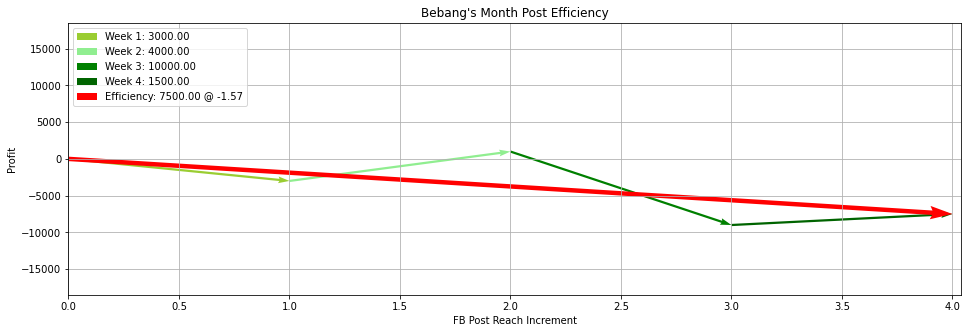

In [8]:
profit= np.array([-3000, 4000, -10000, 1500])       ## You can change the values to make different scenarios
reach = np.array([1, 1, 1, 1])                      ## You can change the values to make different scenarios

month_profit_trace(profit, reach, make_figs=False)  ## Toggle 'make_figs' during debugging or making documentations